# Predicting faulty water pumps


## Background

This series of notebook will focus on a  predictive maintenance problem competition. The business challenge is brought by www.drivendata.org and the goal is to  predict the operation state (functional, repair needed, complete failure) of water pumps in Tanzania. The water pump data is provided by taarifa.org an organization that provides people the ability to report water and sanitation problems in Africa. Here is a dashboard of the status of water points in Tanzania: http://dashboard.taarifa.org/#/dashboard.</br>

![Water Pump](http://drivendata.materials.s3.amazonaws.com/pumps/pumping.jpg) 

source: Pump image courtesy of flickr user christophercjensen


## Business Objectives
Using data from Taarifa and the Tanzanian Ministry of Water, we will be trying to predict which pumps are functional, which need some repairs, and which don't work at all. Prediction will be based on on a number of variables:  what kind of pump is operating, when it was installed, and how it is managed etc. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania</br>

Reference: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table

# Exploratory Data Analysis¶

## Import Libraries
Import libraries necessary to get the exploratory data analysis (EDA) part of the project set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Water Pump Data and Files

Read in the data pump files stored in the directory raw-data into Pandas dataframes

In [2]:
!dir raw-data

 Volume in drive E is DATA
 Volume Serial Number is 6E98-6AE7

 Directory of E:\GitHub\Udacity\machine-learning\projects\capstone-project\raw-data

05/20/2018  08:20 PM    <DIR>          .
05/20/2018  08:20 PM    <DIR>          ..
05/17/2018  12:31 PM         5,016,337 Water_Test_set_values.csv
05/17/2018  12:30 PM         1,148,327 Water_Training_set_labels.csv
05/17/2018  12:30 PM        20,069,199 Water_Training_set_values.csv
               3 File(s)     26,233,863 bytes
               2 Dir(s)  1,928,239,575,040 bytes free


In [34]:
# Files to read
csv_data_sets = ['Water_Training_set_values.csv', 'Water_Training_set_labels.csv', 'Water_Test_set_values.csv']
# used to store dataframes: train_features_df, train_label_df, test_features_df
df_list = [] 

df_i = 0
# Read in the training values, training labels and testing data sets
for i in csv_data_sets:
    try:
        data_file = 'raw-data\\'+ i
        df_list.append(pd.read_csv(data_file))
        print("Water pump dataset {} has {} samples with {} features each".format(data_file, *df_list[df_i].shape))
    except:
        print("Water pump dataset {} could not be loaded. Is the dataset missing?".format(data_file))
    df_i+=1

Water pump dataset raw-data\Water_Training_set_values.csv has 59400 samples with 40 features each
Water pump dataset raw-data\Water_Training_set_labels.csv has 59400 samples with 2 features each
Water pump dataset raw-data\Water_Test_set_values.csv has 14850 samples with 40 features each


In [40]:
# set up the data frames that we will be using to perform EDA 
train_features_df = df_list[0]
train_label_df = df_list[1]
test_features_df = df_list[2]
print("Confirm shapes of the train and test dataframes:",train_features_df.shape, train_label_df.shape, test_features_df.shape)

('Confirm shapes of the train and test dataframes:', (59400, 40), (59400, 2), (14850, 40))


In [53]:
# Look at the foirst few rows of the data set
train_features_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## Exploration of Features

Below is a data disctionary provided (source: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)
* amount_tsh - Total static head (amount water available to waterpoint) <br/>
* date_recorded - The date the row was entered <br/>
* funder - Who funded the well <br/>
* gps_height - Altitude of the well<br/>
* installer - Organization that installed the well<br/>
* longitude - GPS coordinate <br/>
* latitude - GPS coordinate <br/>
* wpt_name - Name of the waterpoint if there is one <br/>
* num_private -
* basin - Geographic water basin<br/>
* subvillage - Geographic location<br/>
* region - Geographic location<br/>
* region_code - Geographic location (coded)<br/>
* district_code - Geographic location (coded)<br/>
* lga - Geographic location<br/>
* ward - Geographic location<br/>
* population - Population around the well<br/>
* public_meeting - True/False<br/>
* recorded_by - Group entering this row of data<br/>
* scheme_management - Who operates the waterpoint<br/>
* scheme_name - Who operates the waterpoint<br/>
* permit - If the waterpoint is permitted<br/>
* construction_year - Year the waterpoint was constructed<br/>
* extraction_type - The kind of extraction the waterpoint uses<br/>
* extraction_type_group - The kind of extraction the waterpoint uses<br/>
* extraction_type_class - The kind of extraction the waterpoint uses<br/>
* management - How the waterpoint is managed<br/>
* management_group - How the waterpoint is managed<br/>
* payment - What the water costs<br/>
* payment_type - What the water costs<br/>
* water_quality - The quality of the water<br/>
* quality_group - The quality of the water<br/>
* quantity - The quantity of water<br/>
* quantity_group - The quantity of water<br/>
* source - The source of the water<br/>
* source_type - The source of the water<br/>
* source_class - The source of the water<br/>
* waterpoint_type - The kind of waterpoint<br/>
* waterpoint_type_group - The kind of waterpoint

In [63]:
# Explore the features of the train set and  dtypes - 40 features  
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

Wow, there are a lot of categorical features - actually 30/40 features are categorical! Let's take a look at the different categories of these features and their distribution

In [70]:
#let's check the categorical features
categorical_features_df = train_features_df.select_dtypes(include=['object']).copy()
categorical_features_df.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [95]:
# Store the list of categorical features
categorical_cols = categorical_features_df.columns.tolist()
# Remove dates features
categorical_cols = categorical_cols[1:] 

#### Cardinality and samples of categorical features

In [92]:
# let's look at the cardinality of categorical features
categorical_features_df.nunique().sort_values(ascending=False)

wpt_name                 37400
subvillage               19287
scheme_name               2696
installer                 2145
ward                      2092
funder                    1897
date_recorded              356
lga                        125
region                      21
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           12
source                      10
basin                        9
water_quality                8
payment                      7
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment_type                 7
quality_group                6
waterpoint_type_group        6
quantity                     5
quantity_group               5
management_group             5
source_class                 3
permit                       2
public_meeting               2
recorded_by                  1
dtype: int64

There is a very large spread of cardinality amongst the categorical features, we will have to be on the look-out in our encoding approach for our modelling 

In [93]:
# let's sample the categorical features
for i in categorical_cols:
    print ("***** \'{}\' feature has \'{}\' category type *****".format(i,categorical_features_df[i].nunique()))
    print(categorical_features_df[i].unique())

***** 'funder' feature has '1897' category type *****
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']
***** 'installer' feature has '2145' category type *****
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
***** 'wpt_name' feature has '37400' category type *****
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
***** 'basin' feature has '9' category type *****
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
***** 'subvillage' feature has '19287' category type *****
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
***** 'region' feature has '21' category type *****
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
***** 'lga' feature has '125' category type **

We observe that some categories have missing or incomplete data fields - e.g. 'nan', 'unknown' etc.
We also observe that lower and upper cases aren't consistent for some of the string categorical values: 'Grumeti' vs 'GRUMETI'

#### Let look in more detail at a few key features
In particular, we will look into how the distribution of water pump observation by the following interesting features:
* location
* water point type
* management group
* quality
* water source

***** 'waterpoint_type' feature distribution breakdown *****


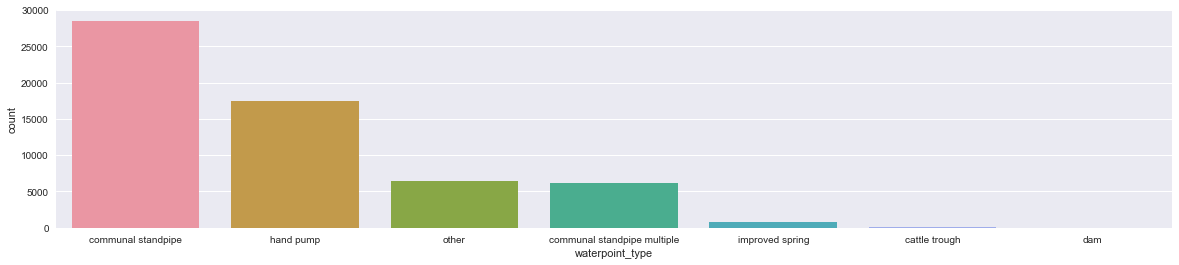

***** 'water_quality' feature distribution breakdown *****


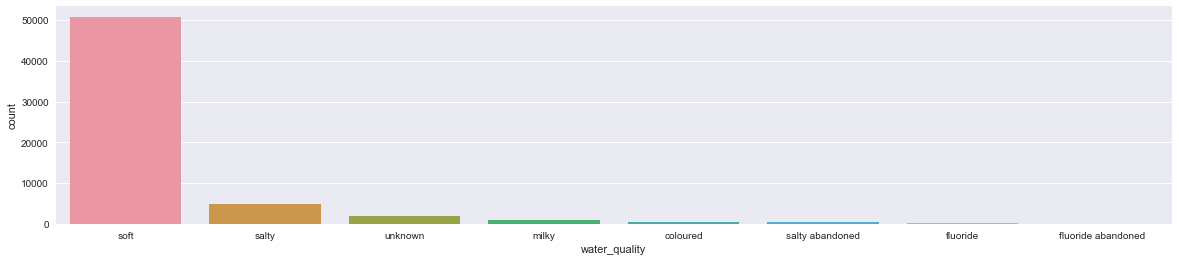

***** 'source_type' feature distribution breakdown *****


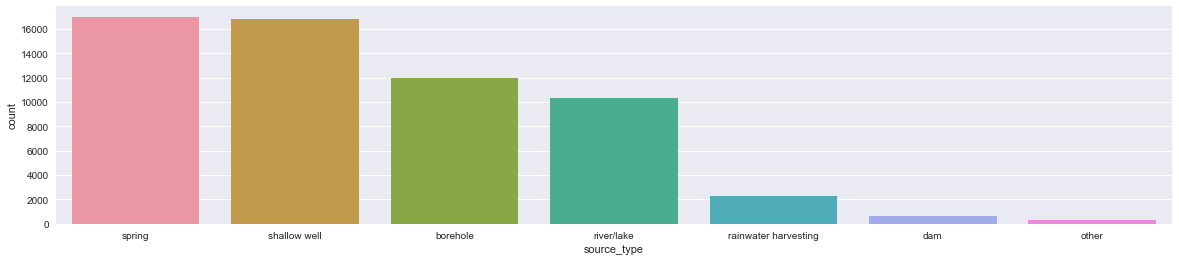

***** 'region' feature distribution breakdown *****


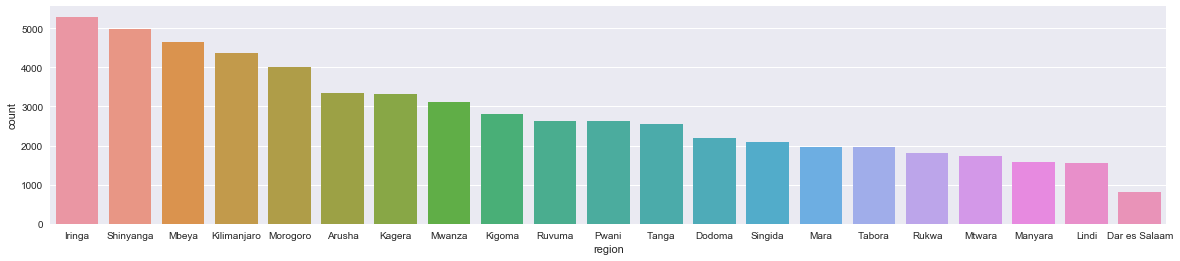

***** 'management_group' feature distribution breakdown *****


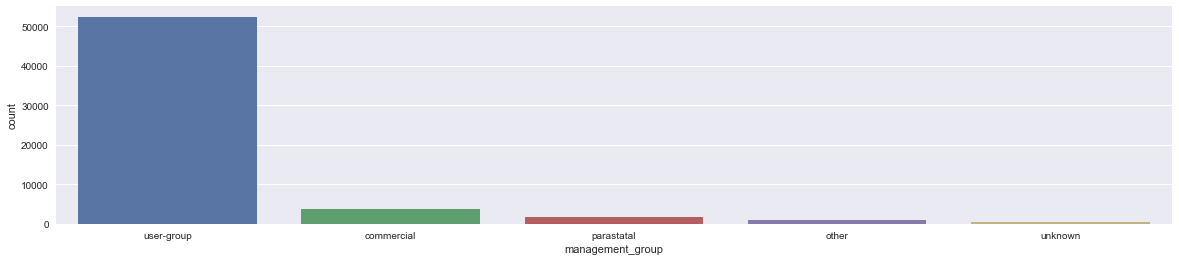

In [118]:
# Categorical features of interest
sample_categorical_features = ['waterpoint_type', 'water_quality', 'source_type','region', 'management_group']
for i in sample_categorical_features:
    print("***** \'{}\' feature distribution breakdown *****".format(i))
    #print(categorical_features_df[i].value_counts())
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = (20,4))
    sns.countplot(x=i,data=categorical_features_df, order = categorical_features_df[i].value_counts().index)
    plt.show()

In [125]:
#let's check the categorical features
numerical_features_df = train_features_df.select_dtypes(include=['int64','float64']).copy()
numerical_features_df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0


A couple of observations:
* most of the numerical features are ordinals (codes) or location infromation
* the only numerical value is amount_tsh: the total static head (amount water available to waterpoint) 
* we can derive another feature - the age of the pump - from the consruction year

In [129]:
# Store the list of numerical features
numerical_cols = numerical_features_df.columns.tolist()

Let's look at the static head numerical info feature (source: www.pumpsandsystems.com):
![static head](https://www.pumpsandsystems.com/sites/default/files/Rockwell_20Fig2.jpg)

In [132]:
# total static head stats profile
numerical_features_df['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

Wow, there are huge variations in this numerical feature. Let's box plot it. 

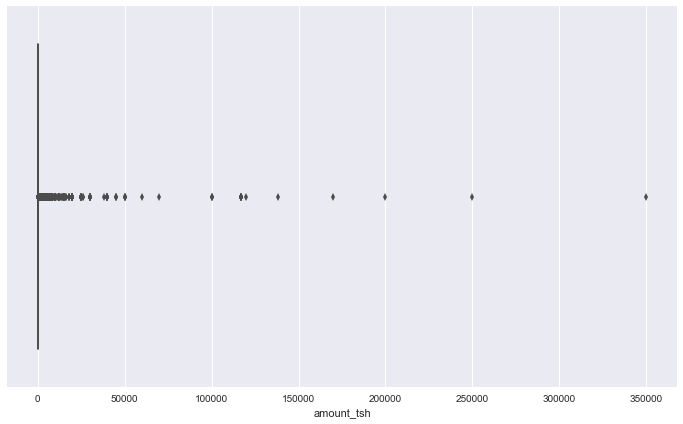

In [144]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=numerical_features_df['amount_tsh'])

There seems to be significant outliers in this numerical features, we will need to deal with these as well before modelling  

### Exploration of labels¶
The labels that we will use to train our modelon represent the status of the water pumps

In [145]:
# Explore the features of the train label set 
train_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


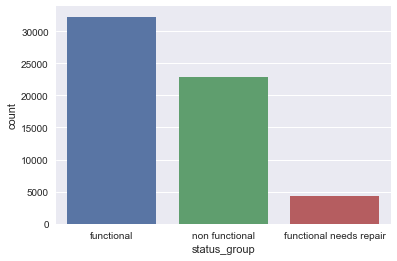

In [146]:
# There are three water pumps possible labels
#train_label_df['status_group'].value_counts()
sns.countplot(x='status_group',data=train_label_df)

We observe that one of the classes is imbalanced - functional needs repair is under represented.


## Missing or Duplicate Data Observations

Use seaborn to create a simple heatmap to see where we are missing data!

### Check the feature test data set

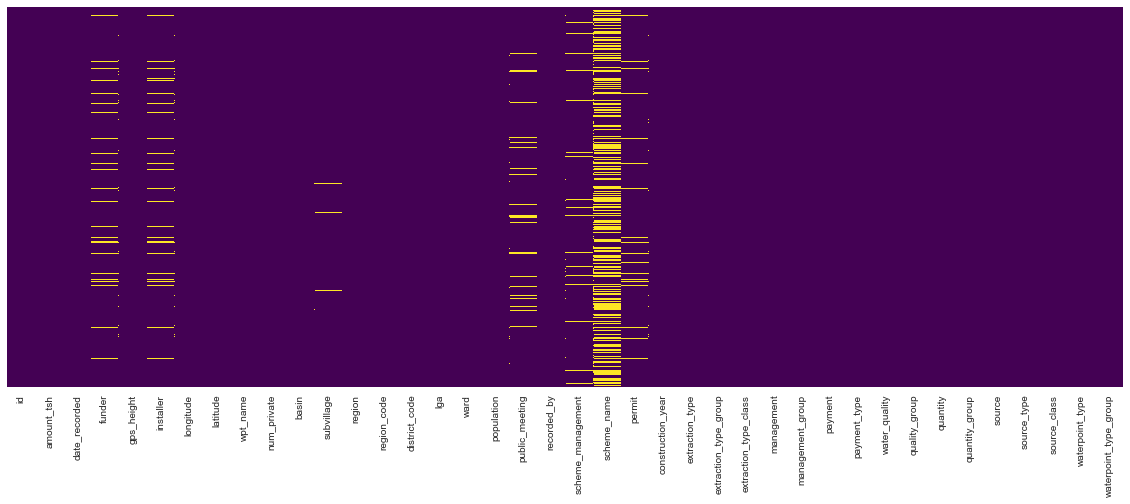

In [166]:
# get an overview of the missing training data fields (NaN) in yellow
plt.figure(figsize=(20, 7))
sns.heatmap(train_features_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are definitely some missing values in this data sets
Let look in more detail at how mainy NaN we have for each feature

In [154]:
# compute number of Nan values for the data set
num_null_val = train_features_df.isnull().sum().sort_values(ascending=False).head(20)
num_null_val

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
waterpoint_type_group        0
population                   0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
dtype: int64

About half the scheme_name feature's values are missing - we might consider dropping this feature. Other features have some missing values but we should be able to impute these missing values 

In [169]:
# now check for duplicates
train_features_df.duplicated().sum()

0

No duplicates in the training data set

### Check the feature label and test data sets

Let's check the labels and the test data sets for missing values

In [164]:
#train_label_df
num_null_val = train_label_df.isnull().sum().sort_values(ascending=False).head(20)
num_null_val
#train_features_df.duplicated().sum()

status_group    0
id              0
dtype: int64

In [170]:
# now check for duplicates
train_label_df.duplicated().sum()

0

No missing or duplicate values for the label data set

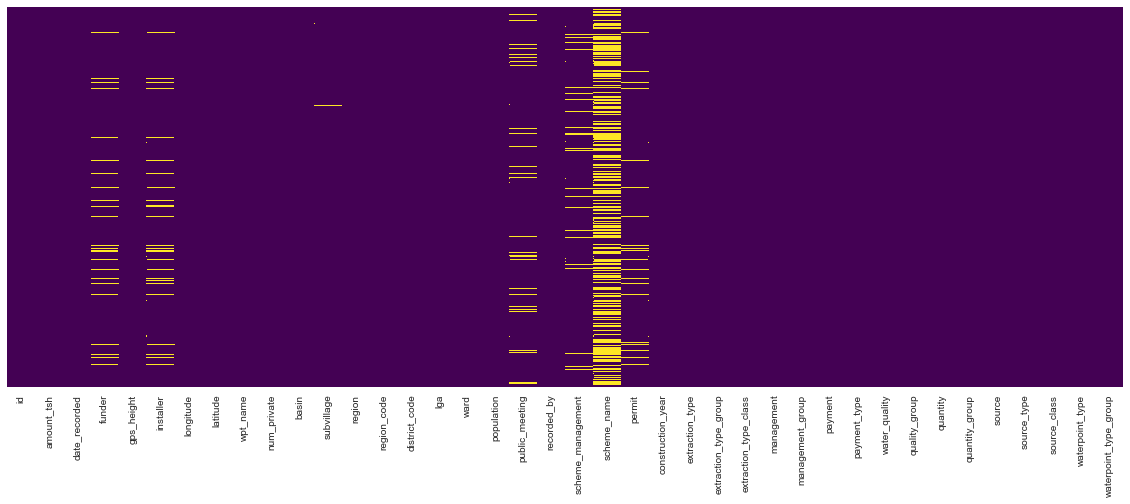

In [167]:
# get an overview of the missing test data fields (NaN) in yellow
plt.figure(figsize=(20, 7))
sns.heatmap(test_features_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [168]:
#test_features_df
num_null_val = test_features_df.isnull().sum().sort_values(ascending=False).head(20)
num_null_val

scheme_name              7092
scheme_management         969
installer                 877
funder                    869
public_meeting            821
permit                    737
subvillage                 99
ward                        0
lga                         0
district_code               0
region_code                 0
region                      0
waterpoint_type_group       0
population                  0
num_private                 0
wpt_name                    0
latitude                    0
longitude                   0
gps_height                  0
date_recorded               0
dtype: int64

Similar to the test data set, many scheme_name feature's values are missing. Other features have some missing values as well

In [173]:
# now check for duplicates
test_features_df.duplicated().sum()

0

No duplicates in the test data set

#### Let's save our pandas data frames to use in the next python notebook

In [184]:
# Save our panda dfs in raw-data
train_features_df.to_pickle('raw-data\pump_train_features_df.pkl')
train_label_df.to_pickle('raw-data\pump_train_label_df.pkl')
test_features_df.to_pickle('raw-data\pump_test_features_df.pkl')

In [185]:
!dir raw-data\*.pkl

 Volume in drive E is DATA
 Volume Serial Number is 6E98-6AE7

 Directory of E:\GitHub\Udacity\machine-learning\projects\capstone-project\raw-data

05/31/2018  12:20 PM         3,634,926 pump_test_features_df.pkl
05/31/2018  12:20 PM        14,615,910 pump_train_features_df.pkl
05/31/2018  12:20 PM           594,995 pump_train_label_df.pkl
               3 File(s)     18,845,831 bytes
               0 Dir(s)  1,928,202,792,960 bytes free


### In the next phase and Jupyter notebook, we will clean and pre-process our data to feed in our ML benchmark (logistic regression)